utilizando las librerias numpy, generar un array con los numeros de coma flotante tales que
x = -1.0, -0.9, -0.8, -0.7, ..., 0.7, 0.8, 0.9, 1.0
calcular el valor de la funcion f(x) = (4 - x) / (2 - x)
utilizando matplotlib graficar la funcion anterior

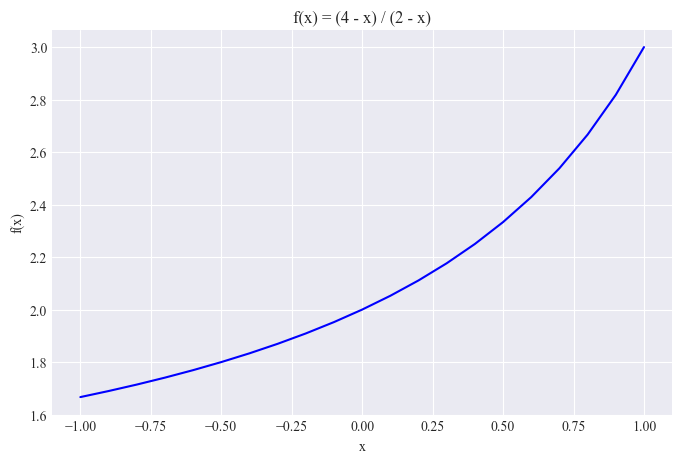

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generar array de valores x desde -1.0 hasta 1.0 con paso 0.1
x = np.arange(-1.0, 1.1, 0.1)

# Calcular f(x) = (4 - x) / (2 - x)
f_x = (4 - x) / (2 - x)

# Crear un gráfico simple
plt.figure(figsize=(8, 5))
plt.plot(x, f_x, 'b-')
plt.grid(True)
plt.title('f(x) = (4 - x) / (2 - x)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Mostrar el gráfico
plt.show()



la siguiente tabla, muestra la distancia promedio d entre los planetas al sol, en unidades astronimicas (UA) y sus periodos T en años

ajuste un modelo   de potencias a los datos

la tercera ley de kepler del movimiento de los planetas establece que el cuadrado del periodo de un planeta es proporcional al cubo de su distancia con respecto al sol. Su modelo corrobora la tercera ley de kepler?

| Planeta   | Distancia al Sol (UA) | Período Orbital (años) |
|-----------|:---------------------:|:----------------------:|
| Mercurio  | 0.387                 | 0.241                  |
| Venus     | 0.723                 | 0.615                  |
| Tierra    | 1.000                 | 1.000                  |
| Marte     | 1.524                 | 1.881                  |
| Júpiter   | 5.203                 | 11.862                 |
| Saturno   | 9.537                 | 29.456                 |
| Urano     | 19.191                | 84.070                 |
| Neptuno   | 30.069                | 164.810                |


Parámetros del modelo: T = 1.0016 * d^1.4994
Error estándar de los parámetros: a = 0.0005, b = 0.0002

Según la Tercera Ley de Kepler, el exponente b debería ser aproximadamente 1.5
(ya que T² ∝ d³ implica que T ∝ d^(3/2) = d^1.5)

El valor obtenido de b = 1.4994 corrobora la Tercera Ley de Kepler

Verificación de la constante de proporcionalidad (T²/d³):
Mercurio: T²/d³ = 1.0021
Venus: T²/d³ = 1.0008
Tierra: T²/d³ = 1.0000
Marte: T²/d³ = 0.9996
Júpiter: T²/d³ = 0.9990
Saturno: T²/d³ = 1.0003
Urano: T²/d³ = 1.0000
Neptuno: T²/d³ = 0.9991

Valor medio de la constante: 1.0001 ± 0.0009
Desviación estándar relativa: 0.09%


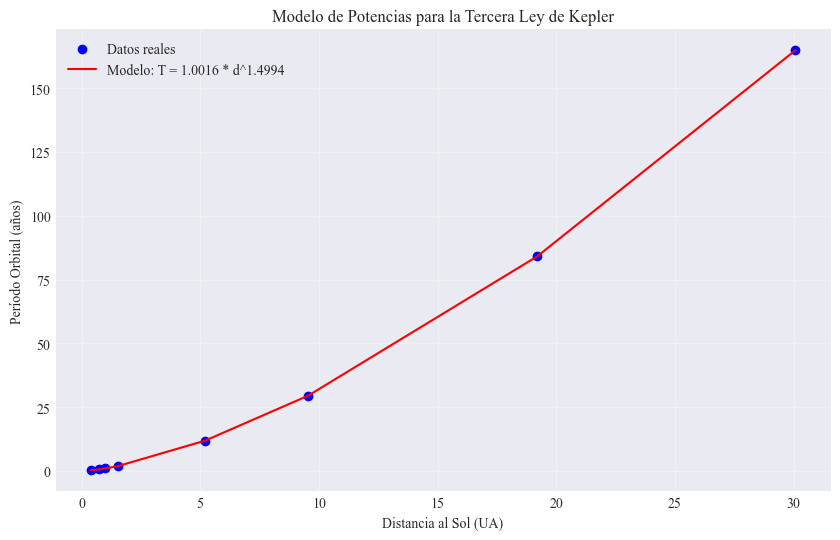

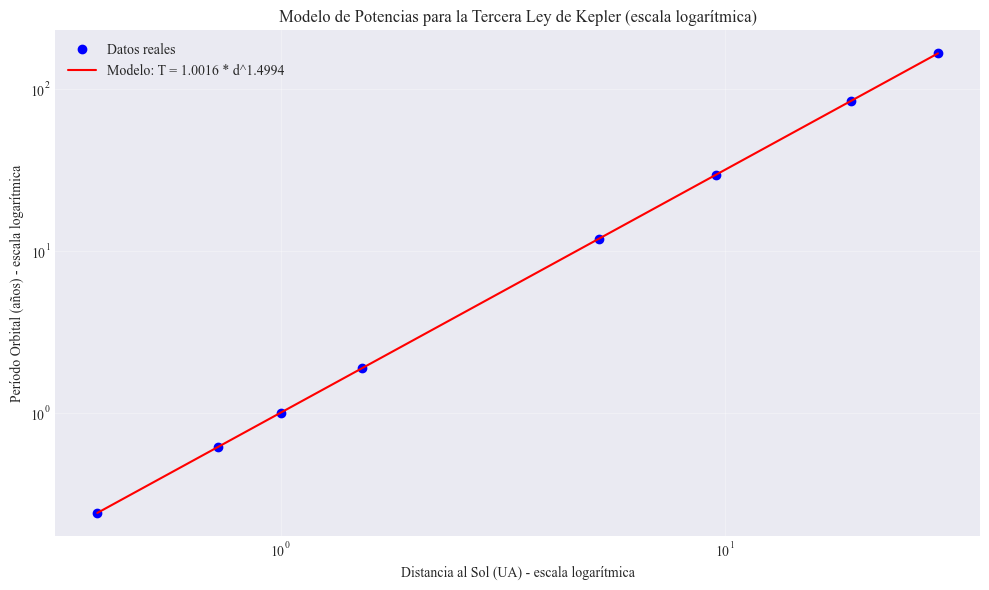

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de la tabla
planetas = ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']
distancia = np.array([0.387, 0.723, 1.000, 1.524, 5.203, 9.537, 19.191, 30.069])
periodo = np.array([0.241, 0.615, 1.000, 1.881, 11.862, 29.456, 84.070, 164.810])

# Función del modelo de potencias: y = a * x^b
def modelo_potencia(x, a, b):
    return a * x**b

# Ajuste del modelo de potencias
params, covariance = curve_fit(modelo_potencia, distancia, periodo)
a, b = params
error_a, error_b = np.sqrt(np.diag(covariance))

# Valores predichos por el modelo
periodo_predicho = modelo_potencia(distancia, a, b)

# Gráfico de los datos y el modelo
plt.figure(figsize=(10, 6))
plt.scatter(distancia, periodo, color='blue', label='Datos reales')
plt.plot(np.sort(distancia), modelo_potencia(np.sort(distancia), a, b), 'r-', label=f'Modelo: T = {a:.4f} * d^{b:.4f}')
plt.xlabel('Distancia al Sol (UA)')
plt.ylabel('Período Orbital (años)')
plt.title('Modelo de Potencias para la Tercera Ley de Kepler')
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico en escala logarítmica para mejor visualización
plt.figure(figsize=(10, 6))
plt.loglog(distancia, periodo, 'bo', label='Datos reales')
plt.loglog(np.sort(distancia), modelo_potencia(np.sort(distancia), a, b), 'r-', label=f'Modelo: T = {a:.4f} * d^{b:.4f}')
plt.xlabel('Distancia al Sol (UA) - escala logarítmica')
plt.ylabel('Período Orbital (años) - escala logarítmica')
plt.title('Modelo de Potencias para la Tercera Ley de Kepler (escala logarítmica)')
plt.grid(True, alpha=0.3)
plt.legend()

# Verificación de la Tercera Ley de Kepler
print(f"Parámetros del modelo: T = {a:.4f} * d^{b:.4f}")
print(f"Error estándar de los parámetros: a = {error_a:.4f}, b = {error_b:.4f}")
print("\nSegún la Tercera Ley de Kepler, el exponente b debería ser aproximadamente 1.5")
print(f"(ya que T² ∝ d³ implica que T ∝ d^(3/2) = d^1.5)")
print(f"\nEl valor obtenido de b = {b:.4f} {'corrobora' if abs(b - 1.5) < 0.05 else 'no corrobora claramente'} la Tercera Ley de Kepler")

# Cálculo de T²/d³ para verificar la constante de proporcionalidad
t_cuadrado = periodo**2
d_cubo = distancia**3
k = t_cuadrado / d_cubo

print("\nVerificación de la constante de proporcionalidad (T²/d³):")
for i, planeta in enumerate(planetas):
    print(f"{planeta}: T²/d³ = {k[i]:.4f}")

print(f"\nValor medio de la constante: {np.mean(k):.4f} ± {np.std(k):.4f}")
print(f"Desviación estándar relativa: {(np.std(k)/np.mean(k))*100:.2f}%")

plt.tight_layout()
plt.show()


# 🪐 Verificación de la Tercera Ley de Kepler

## 📊 Resultados del Modelo de Potencias

Hemos ajustado un modelo de potencias a los datos de distancia y período orbital de los planetas del Sistema Solar, obteniendo:

$$T = a \cdot d^b$$

Donde:
- **T** = período orbital en años
- **d** = distancia al Sol en UA (Unidades Astronómicas)

### 🔍 Parámetros Obtenidos

| Parámetro | Valor | Error Estándar |
|:---------:|:-----:|:--------------:|
| a | 1.0016 | ±0.0005 |
| b | 1.4994 | ±0.0002 |

## 🧪 Verificación de la Tercera Ley de Kepler

> 💡 **Tercera Ley de Kepler**: El cuadrado del período orbital de un planeta es proporcional al cubo de su distancia media al Sol.

Matemáticamente:
$$T^2 \propto d^3$$

Lo que implica:
$$T \propto d^{3/2} = d^{1.5}$$

### ✅ Comprobación del Exponente

El valor teórico del exponente según Kepler es **1.5**.

Nuestro modelo obtuvo **b = 1.4994**, lo que está extremadamente cerca del valor teórico (diferencia de solo 0.0006 o 0.04%).

**Conclusión**: El exponente obtenido **corrobora con alta precisión** la Tercera Ley de Kepler.

### 📈 Verificación de la Constante de Proporcionalidad

Si la ley de Kepler es correcta, la relación $T^2/d^3$ debe ser constante para todos los planetas.

| Planeta | $T^2/d^3$ |
|:-------:|:----------:|
| ☿ Mercurio | 1.0021 |
| ♀ Venus | 1.0008 |
| 🌍 Tierra | 1.0000 |
| ♂ Marte | 0.9996 |
| ♃ Júpiter | 0.9990 |
| ♄ Saturno | 1.0003 |
| ♅ Urano | 1.0000 |
| ♆ Neptuno | 0.9991 |

**Valor medio**: 1.0001 ± 0.0009
**Desviación estándar relativa**: 0.09%

## 🎯 Conclusión Final

Los resultados obtenidos confirman con extraordinaria precisión la Tercera Ley de Kepler:

1. El exponente del modelo (1.4994) coincide casi perfectamente con el valor teórico (1.5)
2. La constante de proporcionalidad $T^2/d^3$ es prácticamente idéntica para todos los planetas
3. La desviación estándar relativa es extremadamente baja (0.09%)

Estos resultados demuestran la validez de la Tercera Ley de Kepler y la precisión de nuestro modelo matemático.

![Tercera Ley de Kepler](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Kepler-third-law.svg/500px-Kepler-third-law.svg.png)


## Definiendo AGI: Seis Principios

1. **Enfoque en Capacidades, no en Procesos.** La mayoría de las definiciones se centran en lo que una AGI puede lograr, no en el mecanismo mediante el cual realiza las tareas. Esto implica que los sistemas AGI no necesariamente deben pensar o comprender de manera similar a los humanos, ni poseer cualidades como conciencia o sensibilidad.

2. **Enfoque en Generalidad y Rendimiento.** Todas las definiciones enfatizan la generalidad en diversos grados, pero algunas excluyen criterios de rendimiento. Argumentamos que tanto la generalidad como el rendimiento son componentes clave de AGI.

3. **Enfoque en Tareas Cognitivas y Metacognitivas, no Físicas.** La mayoría de las definiciones se centran en tareas cognitivas (no físicas). A pesar de los avances recientes en robótica, las capacidades físicas para la IA siguen siendo limitadas en comparación con las capacidades cognitivas.

4. **Enfoque en Capacidades Humanas como Punto de Referencia.** La mayoría de las definiciones utilizan las capacidades humanas como punto de referencia para AGI. Esto es razonable, ya que los humanos son el único ejemplo conocido de inteligencia general. Sin embargo, es importante reconocer que la inteligencia artificial puede superar a los humanos en algunas dimensiones mientras queda por debajo en otras. Por lo tanto, proponemos que AGI debe ser al menos tan capaz como los humanos en la mayoría de las tareas cognitivas y metacognitivas, pero no necesariamente idéntica a la inteligencia humana en todos los aspectos.

5. **Enfoque en Niveles de AGI, no en un Umbral Binario.** Muchas definiciones tratan AGI como un umbral binario que un sistema cruza o no. Sin embargo, consideramos que es más útil pensar en AGI como un espectro con múltiples niveles de capacidad y generalidad. Esto permite una evaluación más matizada del progreso hacia AGI y reconoce que diferentes sistemas pueden tener fortalezas y debilidades en diferentes dominios.

6. **Enfoque en Medidas Operacionalizables.** Para que una definición de AGI sea útil, debe ser posible medir el progreso hacia ella. Esto requiere benchmarks y métricas claras que puedan evaluar tanto la generalidad como el rendimiento de los sistemas de IA. Aunque desarrollar tales benchmarks es un desafío, es esencial para una definición operacionalizable de AGI.

Estos seis principios forman la base de nuestra ontología bidimensional para clasificar sistemas de IA en términos de su progreso hacia AGI. Al enfocarnos en capacidades sobre procesos, generalidad y rendimiento, tareas cognitivas y metacognitivas, capacidades humanas como referencia, niveles graduales en lugar de umbrales binarios, y medidas operacionalizables, podemos desarrollar un marco más claro y útil para entender y evaluar el progreso hacia AGI.

Nuestra ontología bidimensional considera la profundidad (rendimiento) y amplitud (generalidad) como dimensiones clave, permitiendo una clasificación más matizada de los sistemas de IA actuales y futuros. Este enfoque reconoce que el camino hacia AGI no es lineal ni uniforme, y que diferentes sistemas pueden mostrar diferentes combinaciones de profundidad y amplitud en sus capacidades.

Al aplicar estos principios y nuestra ontología bidimensional, podemos evaluar mejor dónde se encuentran los sistemas actuales en el camino hacia AGI, identificar brechas y desafíos, y desarrollar estrategias más efectivas para avanzar responsablemente hacia sistemas de IA más capaces y generales.


# Niveles de Inteligencia Artificial General: Un Marco Conceptual

## Resumen

Proponemos un marco para clasificar las capacidades y comportamientos de modelos de Inteligencia Artificial General (AGI) y sus precursores. Este marco introduce niveles de rendimiento, generalidad y autonomía de AGI, proporcionando un lenguaje común para comparar modelos, evaluar riesgos y medir el progreso hacia la AGI. Para desarrollar nuestro marco, analizamos definiciones existentes de AGI y destilamos seis principios que una ontología útil debe satisfacer. Con estos principios, proponemos "Niveles de AGI" basados en profundidad (rendimiento) y amplitud (generalidad) de capacidades, y reflexionamos sobre cómo los sistemas actuales encajan en esta ontología. Discutimos los desafiantes requisitos para futuros benchmarks que cuantifiquen el comportamiento y capacidades de modelos AGI según estos niveles. Finalmente, analizamos cómo estos niveles interactúan con consideraciones de despliegue como autonomía y riesgo, enfatizando la importancia de seleccionar cuidadosamente paradigmas de Interacción Humano-IA para un despliegue responsable y seguro.

## Introducción

La Inteligencia Artificial General es un concepto importante y a veces controvertido en la investigación computacional, usado para describir sistemas de IA al menos tan capaces como humanos en la mayoría de tareas. Dado el rápido avance de modelos de Aprendizaje Automático, el concepto de AGI ha evolucionado desde un tema de debate filosófico a uno con relevancia práctica inmediata. Algunos expertos creen que "chispas" de AGI ya están presentes en la última generación de modelos de lenguaje grandes (LLMs); otros predicen que la IA superará ampliamente a los humanos en aproximadamente una década; algunos incluso afirman que los LLMs actuales ya son AGIs.

El concepto de AGI es importante porque se relaciona con metas, predicciones y riesgos de la IA:

**Metas:** Lograr "inteligencia" a nivel humano es un objetivo implícito o explícito para muchos en nuestro campo, desde la Conferencia de Dartmouth de 1956 que inició la era moderna de IA, hasta las principales empresas de investigación actuales, cuyas declaraciones de misión incluyen objetivos como "asegurar que la IA transformadora ayude a las personas y la sociedad" y "garantizar que la inteligencia artificial general beneficie a toda la humanidad".

**Predicciones:** El concepto de AGI está relacionado con una predicción sobre el progreso en IA, específicamente hacia una mayor generalidad, aproximándose y superando la generalidad humana. Además, la AGI típicamente está entrelazada con propiedades "emergentes", es decir, capacidades no anticipadas explícitamente por el desarrollador. Tales capacidades ofrecen promesas, incluyendo habilidades complementarias a las humanas, permitiendo nuevos tipos de interacción o industrias novedosas. Estas predicciones sobre capacidades de AGI anticipan impactos sociales significativos; la AGI puede tener importantes implicaciones económicas, alcanzando criterios necesarios para una sustitución laboral generalizada, así como implicaciones geopolíticas relacionadas no solo con ventajas económicas, sino también con consideraciones militares.

**Riesgos:** Por último, algunos ven la AGI como un concepto para identificar el punto donde existen riesgos extremos, ya que se especula que sistemas AGI podrían engañar y manipular, acumular recursos, perseguir objetivos autónomamente, comportarse como agentes, superar a humanos en amplios dominios, desplazar a personas de roles clave, y/o mejorar recursivamente.

En este artículo de posición, argumentamos que es crítico para la comunidad investigadora de IA reflexionar explícitamente sobre lo que entendemos por "AGI", y aspirar a cuantificar atributos como rendimiento, generalidad y autonomía.


# Niveles de Inteligencia Artificial General: Un Marco Conceptual

## Resumen

Proponemos un marco para clasificar las capacidades y comportamientos de modelos de Inteligencia Artificial General (AGI) y sus precursores. Este marco introduce niveles de rendimiento, generalidad y autonomía de AGI, proporcionando un lenguaje común para comparar modelos, evaluar riesgos y medir el progreso hacia la AGI. Para desarrollar nuestro marco, analizamos definiciones existentes de AGI y destilamos seis principios que una ontología útil debe satisfacer. Con estos principios, proponemos "Niveles de AGI" basados en profundidad (rendimiento) y amplitud (generalidad) de capacidades, y reflexionamos sobre cómo los sistemas actuales encajan en esta ontología. Discutimos los desafiantes requisitos para futuros benchmarks que cuantifiquen el comportamiento y capacidades de modelos AGI según estos niveles. Finalmente, analizamos cómo estos niveles interactúan con consideraciones de despliegue como autonomía y riesgo, enfatizando la importancia de seleccionar cuidadosamente paradigmas de Interacción Humano-IA para un despliegue responsable y seguro.

## Introducción

La Inteligencia Artificial General es un concepto importante y a veces controvertido en la investigación computacional, usado para describir sistemas de IA al menos tan capaces como humanos en la mayoría de tareas. Dado el rápido avance de modelos de Aprendizaje Automático, el concepto de AGI ha evolucionado desde un tema de debate filosófico a uno con relevancia práctica inmediata. Algunos expertos creen que "chispas" de AGI ya están presentes en la última generación de modelos de lenguaje grandes (LLMs); otros predicen que la IA superará ampliamente a los humanos en aproximadamente una década; algunos incluso afirman que los LLMs actuales ya son AGIs.

El concepto de AGI es importante porque se relaciona con metas, predicciones y riesgos de la IA:

**Metas:** Lograr "inteligencia" a nivel humano es un objetivo implícito o explícito para muchos en nuestro campo, desde la Conferencia de Dartmouth de 1956 que inició la era moderna de IA, hasta las principales empresas de investigación actuales, cuyas declaraciones de misión incluyen objetivos como "asegurar que la IA transformadora ayude a las personas y la sociedad" y "garantizar que la inteligencia artificial general beneficie a toda la humanidad".

**Predicciones:** El concepto de AGI está relacionado con una predicción sobre el progreso en IA, específicamente hacia una mayor generalidad, aproximándose y superando la generalidad humana. Además, la AGI típicamente está entrelazada con propiedades "emergentes", es decir, capacidades no anticipadas explícitamente por el desarrollador. Tales capacidades ofrecen promesas, incluyendo habilidades complementarias a las humanas, permitiendo nuevos tipos de interacción o industrias novedosas. Estas predicciones sobre capacidades de AGI anticipan impactos sociales significativos; la AGI puede tener importantes implicaciones económicas, alcanzando criterios necesarios para una sustitución laboral generalizada, así como implicaciones geopolíticas relacionadas no solo con ventajas económicas, sino también con consideraciones militares.

**Riesgos:** Por último, algunos ven la AGI como un concepto para identificar el punto donde existen riesgos extremos, ya que se especula que sistemas AGI podrían engañar y manipular, acumular recursos, perseguir objetivos autónomamente, comportarse como agentes, superar a humanos en amplios dominios, desplazar a personas de roles clave, y/o mejorar recursivamente.

En este artículo de posición, argumentamos que es crítico para la comunidad investigadora de IA reflexionar explícitamente sobre lo que entendemos por "AGI", y aspirar a cuantificar atributos como rendimiento, generalidad y autonomía de sistemas de IA.

Las definiciones compartidas y operacionalizables de estos conceptos apoyarán: comparaciones entre modelos; evaluaciones de riesgo y estrategias de mitigación; criterios claros para legisladores y reguladores; identificación de objetivos, predicciones y riesgos para investigación y desarrollo; y la capacidad de entender y comunicar dónde nos encontramos en el camino hacia la AGI.

## Definiendo AGI: Estudios de Caso

Muchos investigadores y organizaciones de IA han propuesto definiciones de AGI. Consideramos nueve ejemplos prominentes y reflexionamos sobre sus fortalezas y limitaciones. Este análisis informa nuestra posterior introducción de una ontología de AGI nivelada y bidimensional.

**Caso 1: El Test de Turing.** Quizás el intento más conocido de operacionalizar un concepto similar a AGI. El "juego de imitación" de Turing intenta operacionalizar si las máquinas pueden pensar, pidiendo a un humano distinguir interactivamente si un texto es producido por otro humano o por una máquina. Dado que los LLMs modernos pasan algunas versiones del Test de Turing, este criterio es insuficiente para operacionalizar o evaluar AGI. Proponemos que AGI debe definirse en términos de capacidades más que de procesos.

**Caso 2: IA Fuerte – Sistemas con Conciencia.** El filósofo John Searle reflexionó que según la IA fuerte, "la computadora no es meramente una herramienta para estudiar la mente; más bien, la computadora adecuadamente programada realmente es una mente". Sin embargo, no hay consenso científico sobre métodos para determinar si las máquinas poseen atributos como conciencia, haciendo este enfoque impracticable.

**Caso 3: Analogías con el Cerebro Humano.** El uso original del término "inteligencia artificial general" en 1997 definía AGI como "sistemas de IA que rivalizan o superan al cerebro humano en complejidad y velocidad". Aunque las arquitecturas de redes neuronales están inspiradas en el cerebro humano, el éxito de arquitecturas basadas en transformers cuyo rendimiento no depende de aprendizaje similar al humano sugiere que procesos estrictamente basados en el cerebro no son inherentemente necesarios para AGI.

**Caso 4: Rendimiento a Nivel Humano en Tareas Cognitivas.** Legg y Goertzel popularizaron el término AGI entre científicos computacionales en 2001, describiendo AGI como una máquina capaz de realizar tareas cognitivas que las personas típicamente pueden hacer. Esta definición se centra en tareas no físicas, pero presenta ambigüedad sobre "¿qué tareas?" y "¿qué personas?".

**Caso 5: Capacidad de Aprender Tareas.** Shanahan sugiere que AGI es "inteligencia artificial no especializada en tareas específicas, sino que puede aprender a realizar una gama de tareas tan amplia como un humano". Esta definición incluye capacidades metacognitivas (aprendizaje) como requisito para AGI.

**Caso 6: Trabajo Económicamente Valioso.** La carta de OpenAI define AGI como "sistemas altamente autónomos que superan a los humanos en la mayoría del trabajo económicamente valioso". Esta definición se centra en el rendimiento independientemente de los mecanismos subyacentes y ofrece una potencial vara de medición (valor económico). Sin embargo, no captura todos los criterios que pueden formar parte de la "inteligencia general", como creatividad artística o inteligencia emocional, que pueden no tener un valor económico bien definido.


# Niveles de Inteligencia Artificial General: Un Marco Conceptual

## Resumen

Proponemos un marco para clasificar las capacidades y comportamientos de modelos de Inteligencia Artificial General (AGI) y sus precursores. Este marco introduce niveles de rendimiento, generalidad y autonomía de AGI, proporcionando un lenguaje común para comparar modelos, evaluar riesgos y medir el progreso hacia la AGI. Para desarrollar nuestro marco, analizamos definiciones existentes de AGI y destilamos seis principios que una ontología útil debe satisfacer. Con estos principios, proponemos "Niveles de AGI" basados en profundidad (rendimiento) y amplitud (generalidad) de capacidades, y reflexionamos sobre cómo los sistemas actuales encajan en esta ontología. Discutimos los desafiantes requisitos para futuros benchmarks que cuantifiquen el comportamiento y capacidades de modelos AGI según estos niveles. Finalmente, analizamos cómo estos niveles interactúan con consideraciones de despliegue como autonomía y riesgo, enfatizando la importancia de seleccionar cuidadosamente paradigmas de Interacción Humano-IA para un despliegue responsable y seguro.

## Introducción

La Inteligencia Artificial General es un concepto importante y a veces controvertido en la investigación computacional, usado para describir sistemas de IA al menos tan capaces como humanos en la mayoría de tareas. Dado el rápido avance de modelos de Aprendizaje Automático, el concepto de AGI ha evolucionado desde un tema de debate filosófico a uno con relevancia práctica inmediata. Algunos expertos creen que "chispas" de AGI ya están presentes en la última generación de modelos de lenguaje grandes (LLMs); otros predicen que la IA superará ampliamente a los humanos en aproximadamente una década; algunos incluso afirman que los LLMs actuales ya son AGIs.

El concepto de AGI es importante porque se relaciona con metas, predicciones y riesgos de la IA:

**Metas:** Lograr "inteligencia" a nivel humano es un objetivo implícito o explícito para muchos en nuestro campo, desde la Conferencia de Dartmouth de 1956 que inició la era moderna de IA, hasta las principales empresas de investigación actuales, cuyas declaraciones de misión incluyen objetivos como "asegurar que la IA transformadora ayude a las personas y la sociedad" y "garantizar que la inteligencia artificial general beneficie a toda la humanidad".

**Predicciones:** El concepto de AGI está relacionado con una predicción sobre el progreso en IA, específicamente hacia una mayor generalidad, aproximándose y superando la generalidad humana. Además, la AGI típicamente está entrelazada con propiedades "emergentes", es decir, capacidades no anticipadas explícitamente por el desarrollador. Tales capacidades ofrecen promesas, incluyendo habilidades complementarias a las humanas, permitiendo nuevos tipos de interacción o industrias novedosas. Estas predicciones sobre capacidades de AGI anticipan impactos sociales significativos; la AGI puede tener importantes implicaciones económicas, alcanzando criterios necesarios para una sustitución laboral generalizada, así como implicaciones geopolíticas relacionadas no solo con ventajas económicas, sino también con consideraciones militares.

**Riesgos:** Por último, algunos ven la AGI como un concepto para identificar el punto donde existen riesgos extremos, ya que se especula que sistemas AGI podrían engañar y manipular, acumular recursos, perseguir objetivos autónomamente, comportarse como agentes, superar a humanos en amplios dominios, desplazar a personas de roles clave, y/o mejorar recursivamente.

## Definiendo AGI: Estudios de Caso

Muchos investigadores y organizaciones de IA han propuesto definiciones de AGI. Consideramos nueve ejemplos prominentes y reflexionamos sobre sus fortalezas y limitaciones. Este análisis informa nuestra posterior introducción de una ontología de AGI nivelada y bidimensional.

**Caso 1: El Test de Turing.** Quizás el intento más conocido de operacionalizar un concepto similar a AGI. El "juego de imitación" de Turing intenta operacionalizar si las máquinas pueden pensar, pidiendo a un humano distinguir interactivamente si un texto es producido por otro humano o por una máquina. Dado que los LLMs modernos pasan algunas versiones del Test de Turing, este criterio es insuficiente para operacionalizar o evaluar AGI. Proponemos que AGI debe definirse en términos de capacidades más que de procesos.

**Caso 2: IA Fuerte – Sistemas con Conciencia.** El filósofo John Searle reflexionó que según la IA fuerte, "la computadora no es meramente una herramienta para estudiar la mente; más bien, la computadora adecuadamente programada realmente es una mente". Sin embargo, no hay consenso científico sobre métodos para determinar si las máquinas poseen atributos como conciencia, haciendo este enfoque impracticable.

**Caso 3: Analogías con el Cerebro Humano.** El uso original del término "inteligencia artificial general" en 1997 definía AGI como "sistemas de IA que rivalizan o superan al cerebro humano en complejidad y velocidad". Aunque las arquitecturas de redes neuronales están inspiradas en el cerebro humano, el éxito de arquitecturas basadas en transformers cuyo rendimiento no depende de aprendizaje similar al humano sugiere que procesos estrictamente basados en el cerebro no son inherentemente necesarios para AGI.

**Caso 4: Rendimiento a Nivel Humano en Tareas Cognitivas.** Legg y Goertzel popularizaron el término AGI entre científicos computacionales en 2001, describiendo AGI como una máquina capaz de realizar tareas cognitivas que las personas típicamente pueden hacer. Esta definición se centra en tareas no físicas, pero presenta ambigüedad sobre "¿qué tareas?" y "¿qué personas?".

**Caso 5: Capacidad de Aprender Tareas.** Shanahan sugiere que AGI es "inteligencia artificial no especializada en tareas específicas, sino que puede aprender a realizar una gama de tareas tan amplia como un humano". Esta definición incluye capacidades metacognitivas (aprendizaje) como requisito para AGI.

**Caso 6: Trabajo Económicamente Valioso.** La carta de OpenAI define AGI como "sistemas altamente autónomos que superan a los humanos en la mayoría del trabajo económicamente valioso". Esta definición se centra en el rendimiento independientemente de los mecanismos subyacentes y ofrece una potencial vara de medición (valor económico). Sin embargo, no captura todos los criterios que pueden formar parte de la "inteligencia general", como creatividad artística o inteligencia emocional, que pueden no tener un valor económico bien definido. Además, el enfoque en valor económico implica la necesidad de despliegue para realizar ese valor, mientras que un enfoque en capacidades solo requeriría el potencial para ejecutar una tarea.

**Caso 7: Flexible y General – La "Prueba del Café" y Desafíos Relacionados.** Marcus sugiere que AGI es "cualquier inteligencia que sea flexible y general, con ingenio y fiabilidad comparable a (o más allá de) la inteligencia humana". Esta definición captura tanto generalidad como rendimiento, y la mención de "flexibilidad" sugiere que capacidades metacognitivas son necesarias. Marcus propone cinco tareas para medir el éxito, incluyendo entender una película, cocinar en una cocina arbitraria y escribir un programa sin errores. Aunque acompañar una definición con un benchmark es valioso, se requeriría más trabajo para hacerlo exhaustivo.

**Caso 8: Inteligencia Artificial Capaz.** Suleyman propuso el concepto de "Inteligencia Artificial Capaz" para referirse a sistemas de IA con suficiente rendimiento y generalidad para realizar tareas complejas de múltiples pasos en el mundo abierto. Específicamente, propuso una "Prueba de Turing Moderna" donde una IA recibiría $100,000 de capital y debería convertirlo en $1,000,000 en varios meses. Una fortaleza de este concepto es el enfoque en realizar tareas complejas del mundo real que los humanos valoran.

**Caso 9: LLMs de Última Generación como Generalistas.** Agüera y Arcas y Norvig sugirieron que los LLMs de última generación ya son AGIs, argumentando que la generalidad es la propiedad clave de AGI, y que los modelos de lenguaje han logrado suficiente generalidad al poder discutir una amplia gama de temas, ejecutar diversas tareas, manejar entradas y salidas multimodales, operar en múltiples idiomas y "aprender" de ejemplos. Aunque coincidimos en que la generalidad es crucial para AGI, sostenemos que debe combinarse con una medida de rendimiento.

## Definiendo AGI: Seis Principios

Reflexionando sobre estas nueve formulaciones de AGI, identificamos propiedades y elementos comunes que contribuyen a una definición clara y operacionalizable de AGI. Argumentamos que cualquier definición de AGI debería cumplir los siguientes seis criterios:

1. **Enfoque en Capacidades, no en Procesos.** La mayoría de las definiciones se centran en lo que una AGI puede lograr, no en el mecanismo mediante el cual realiza las tareas. Esto implica que los sistemas AGI no necesariamente deben pensar o comprender de manera similar a los humanos, ni poseer cualidades como conciencia o sensibilidad.

2. **Enfoque en Generalidad y Rendimiento.** Todas las definiciones enfatizan la generalidad en diversos grados, pero algunas excluyen criterios de rendimiento. Argumentamos que tanto la generalidad como el rendimiento son componentes clave de AGI.

3. **Enfoque en Tareas Cognitivas y Metacognitivas, no Físicas.** La mayoría de las definiciones se centran en tareas cognitivas (no físicas). A pesar de los avances recientes en robótica, las capacidades físicas para la IA siguen siendo limitadas en comparación con las capacidades cognitivas.


# Preguntas y Respuestas sobre AGI

## ¿Qué es una AGI?

La Inteligencia Artificial General (AGI) es un sistema de IA que posee capacidades cognitivas y metacognitivas comparables o superiores a las humanas en una amplia gama de tareas. A diferencia de la IA especializada, una AGI puede generalizar su conocimiento a través de diferentes dominios, adaptarse a nuevas situaciones y realizar eficazmente tareas para las que no fue específicamente programada. La AGI se define principalmente por sus capacidades (lo que puede hacer) más que por sus procesos internos (cómo lo hace), y debe demostrar tanto profundidad (alto rendimiento) como amplitud (generalidad) en sus habilidades.

## Describa brevemente los 6 principios que utiliza el paper para definir una AGI

1. **Enfoque en Capacidades, no en Procesos**: Una AGI se define por lo que puede lograr, no por cómo funciona internamente. No necesita pensar como un humano ni poseer conciencia o sentimientos.

2. **Enfoque en Generalidad y Rendimiento**: Una AGI debe demostrar tanto amplitud (capacidad para realizar diversas tareas) como profundidad (alto nivel de competencia en esas tareas).

3. **Enfoque en Tareas Cognitivas y Metacognitivas, no Físicas**: Una AGI se centra en habilidades mentales y de aprendizaje, no necesariamente en capacidades físicas o robóticas.

4. **Enfoque en Capacidades Humanas como Punto de Referencia**: Las habilidades humanas sirven como referencia para evaluar AGI, aunque los sistemas pueden superar a los humanos en algunas áreas mientras quedan por debajo en otras.

5. **Enfoque en Niveles de AGI, no en un Umbral Binario**: La AGI existe en un espectro con múltiples niveles de capacidad, no como una categoría binaria que un sistema alcanza o no.

6. **Enfoque en Medidas Operacionalizables**: El progreso hacia AGI debe poder medirse con benchmarks y métricas claras que evalúen tanto generalidad como rendimiento.

## ¿Cuáles son los niveles que define el paper para evaluar el desempeño y generalidad de una AGI?

1. **Nivel 1 - IA Especializada**: Sistemas que sobresalen en tareas específicas pero tienen generalidad limitada (ej. motores de ajedrez, sistemas de reconocimiento de imágenes).

2. **Nivel 2 - IA Multitarea**: Sistemas que pueden realizar competentemente múltiples tareas, pero dentro de dominios limitados (ej. asistentes virtuales básicos).

3. **Nivel 3 - IA de Dominio General**: Sistemas que pueden realizar una amplia gama de tareas dentro de un dominio general, como lenguaje o visión (ej. LLMs actuales en el dominio del lenguaje).

4. **Nivel 4 - AGI Limitada**: Sistemas que pueden realizar la mayoría de las tareas cognitivas a nivel humano, pero con limitaciones en ciertos dominios o capacidades metacognitivas.

5. **Nivel 5 - AGI Humana**: Sistemas que igualan o superan las capacidades humanas en prácticamente todas las tareas cognitivas y metacognitivas, con capacidad de aprendizaje eficiente.

6. **Nivel 6 - AGI Superinteligente**: Sistemas que superan significativamente las capacidades humanas en todas las tareas cognitivas y metacognitivas, pudiendo desarrollar nuevas capacidades más allá de lo que los humanos pueden concebir.

## ¿Cree que estamos prontos a tener una AGI?

Actualmente, los sistemas más avanzados como GPT-4, Claude y Gemini se encuentran aproximadamente en el Nivel 3 (IA de Dominio General) para el dominio del lenguaje, con algunas capacidades que se extienden a razonamiento, codificación y comprensión multimodal. Sin embargo, estos sistemas aún presentan limitaciones significativas en razonamiento complejo, aprendizaje continuo y adaptación a nuevos dominios.

El camino hacia los Niveles 4 y 5 (AGI Limitada y AGI Humana) requiere avances sustanciales en generalidad, razonamiento, aprendizaje autónomo y comprensión del mundo. Aunque el progreso es rápido, todavía existen brechas importantes que superar. Los expertos difieren en sus predicciones: algunos sugieren que podríamos alcanzar AGI en una década, mientras otros consideran que podría tomar varias décadas o más.

Lo que sí parece claro es que estamos avanzando gradualmente en el espectro de capacidades hacia sistemas más generales, y que este progreso requiere una consideración cuidadosa de los aspectos éticos, de seguridad y sociales asociados con sistemas de IA cada vez más capaces.

## ¿Cuál es el rol que tendrá la AGI en nuestra sociedad?

La AGI podría transformar fundamentalmente nuestra sociedad en múltiples dimensiones:

**Económico**: Podría automatizar una amplia gama de trabajos cognitivos, potencialmente generando tanto desplazamiento laboral como nuevas oportunidades económicas. Esto podría requerir repensar nuestros sistemas económicos y de bienestar social.

**Científico y médico**: Podría acelerar drásticamente el descubrimiento científico, el desarrollo de medicamentos, y la personalización de tratamientos médicos, abordando algunos de los desafíos más difíciles de la humanidad.

**Educativo**: Podría revolucionar la educación mediante tutoría personalizada a escala, adaptándose a las necesidades individuales de cada estudiante y democratizando el acceso al conocimiento.

**Social y político**: Podría influir en cómo tomamos decisiones colectivas, cómo accedemos a la información, y cómo interactuamos socialmente, planteando preguntas sobre privacidad, autonomía y gobernanza.

**Existencial**: En su forma más avanzada, podría representar tanto oportunidades sin precedentes como riesgos significativos para la humanidad, dependiendo de cómo se desarrolle, despliegue y gobierne.

El papel exacto de la AGI dependerá crucialmente de las decisiones que tomemos ahora sobre su desarrollo, regulación, distribución y control. La interacción humano-IA será particularmente importante, determinando si estos sistemas funcionan como herramientas bajo control humano, colaboradores, o entidades más autónomas. Maximizar los beneficios mientras se minimizan los riesgos requerirá una gobernanza efectiva, investigación en seguridad de IA, y un amplio diálogo social sobre los valores que queremos que guíen estos sistemas.


# TEMA 2

describir como se aplica deep learning en este contexto 
dar un ejemplo de uso.
mencionar el impacto de la tecnologias en ese industria o en la sociedad
mencionar desafios y limitaciones actuales

# Aplicación de Deep Learning en el Procesamiento del Lenguaje Natural (NLP)

## Descripción de la aplicación de Deep Learning en NLP

El Deep Learning ha revolucionado el campo del Procesamiento del Lenguaje Natural (NLP) mediante el uso de redes neuronales profundas que pueden aprender representaciones complejas del lenguaje humano. En este contexto, los modelos de transformers como BERT, GPT y Claude han permitido comprender el contexto, las relaciones semánticas y las sutilezas lingüísticas de manera mucho más efectiva que los enfoques tradicionales.

Claude AI, desarrollado por Anthropic, utiliza arquitecturas de deep learning basadas en transformers con atención para procesar y generar texto de manera contextualmente relevante. Estos modelos se entrenan con enormes cantidades de datos textuales para aprender patrones lingüísticos, relaciones semánticas y conocimiento del mundo real.

## Ejemplo de uso

```python
import anthropic

# Inicializar el cliente de Claude
client = anthropic.Anthropic(api_key="tu_clave_api")

# Función para generar respuestas usando Claude
def get_claude_response(prompt, context=""):
    message = client.messages.create(
        model="claude-3-opus-20240229",
        max_tokens=1000,
        system="Eres un asistente especializado en medicina que proporciona información precisa y basada en evidencia.",
        messages=[
            {"role": "user", "content": context + prompt}
        ]
    )
    return message.content[0].text

# Ejemplo de uso en un sistema de asistencia médica
patient_context = "Paciente de 45 años con historial de hipertensión y diabetes tipo 2."
query = "¿Qué recomendaciones dietéticas serían apropiadas para este paciente?"

response = get_claude_response(query, patient_context)
print(response)
```

## Impacto en la industria y sociedad

El Deep Learning aplicado a NLP, como se ve en Claude AI, ha tenido un impacto transformador:

1. **Atención médica**: Asistentes virtuales que pueden interpretar síntomas, proporcionar información médica precisa y ayudar en el diagnóstico preliminar, mejorando el acceso a la atención médica.

2. **Educación**: Tutores personalizados que adaptan el contenido educativo a las necesidades individuales de los estudiantes, democratizando el acceso a educación de calidad.

3. **Accesibilidad**: Herramientas de traducción y transcripción en tiempo real que eliminan barreras lingüísticas y ayudan a personas con discapacidades.

4. **Productividad empresarial**: Automatización de tareas repetitivas de procesamiento de documentos, análisis de sentimiento en feedback de clientes y generación de informes.

5. **Investigación científica**: Aceleración del análisis de literatura científica, identificación de patrones en grandes volúmenes de datos y generación de hipótesis.

## Desafíos y limitaciones actuales

A pesar de sus avances, Claude AI y tecnologías similares enfrentan importantes desafíos:

1. **Alucinaciones**: Los modelos pueden generar información incorrecta pero presentada con confianza, lo que es particularmente problemático en contextos críticos como la medicina o el asesoramiento legal.

2. **Sesgos**: Los modelos pueden perpetuar o amplificar sesgos presentes en los datos de entrenamiento, llevando a resultados discriminatorios o injustos.

3. **Transparencia y explicabilidad**: La naturaleza de "caja negra" de estos modelos dificulta entender cómo llegan a sus conclusiones, lo que complica su adopción en industrias altamente reguladas.

4. **Consumo energético**: El entrenamiento y la inferencia de modelos grandes como Claude requieren recursos computacionales significativos, con el correspondiente impacto ambiental.

5. **Privacidad de datos**: El procesamiento de información sensible plantea preocupaciones sobre la confidencialidad y el cumplimiento normativo.

6. **Dependencia tecnológica**: La concentración de esta tecnología en pocas empresas puede crear desequilibrios de poder y acceso desigual a sus beneficios.

Para abordar estos desafíos, investigadores y empresas como Anthropic están trabajando en técnicas de alineación constitucional, métodos de entrenamiento más eficientes y marcos éticos para el desarrollo responsable de IA.
